In [8]:
import pandas as pd
df = pd.read_csv(r'C:\Users\CVR\Downloads\inventory_dataset.csv')
df.head()

,Dealer_ID,Product_ID,Location,Stock_Level,Daily_Consumption,Reorder_Threshold,Last_Updated
0,Dealer_52,Product_38,West,206.0,8,69,2024-01-01 00:00:00
1,Dealer_93,Product_38,Central,420.0,12,122,2024-01-01 01:00:00
2,Dealer_15,Product_29,West,411.0,4,78,2024-01-01 02:00:00
3,Dealer_72,Product_41,North,305.0,2,169,2024-01-01 03:00:00
4,Dealer_61,Product_36,East,310.0,10,107,2024-01-01 04:00:00


In [2]:
df.isna().sum()

Dealer_ID              0
Product_ID             0
Location               0
Stock_Level          532
Daily_Consumption      0
Reorder_Threshold      0
Last_Updated           0
dtype: int64

In [6]:
df['Stock_Level'].fillna(df['Stock_Level'].mean(),inplace=True)
print(df.isna().sum())
df.duplicated()

Dealer_ID            0
Product_ID           0
Location             0
Stock_Level          0
Daily_Consumption    0
Reorder_Threshold    0
Last_Updated         0
dtype: int64


0        False
1        False
2        False
3        False
4        False
         ...  
10495     True
10496     True
10497     True
10498     True
10499     True
Length: 10500, dtype: bool

In [7]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

<Axes: >

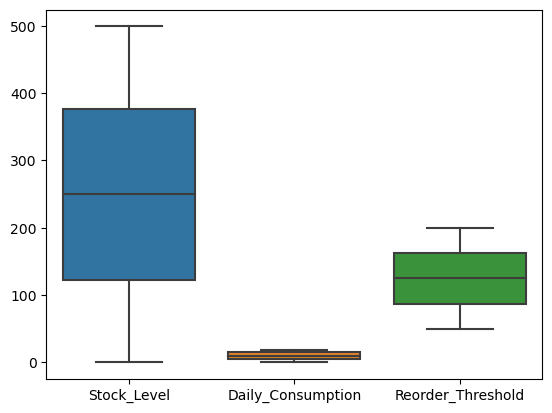

In [10]:
#if outliers
import seaborn as sns
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
    df = remove_outliers(df, col)
sns.boxplot(df)



In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Dealer_ID']=encoder.fit_transform(df['Dealer_ID'])
df['Product_ID']=encoder.fit_transform(df['Product_ID'])
df['Location']=encoder.fit_transform(df['Location'])
df.head()

,Dealer_ID,Product_ID,Location,Stock_Level,Daily_Consumption,Reorder_Threshold,Last_Updated
0,48,31,4,206.0,8,69,2024-01-01 00:00:00
1,93,31,0,420.0,12,122,2024-01-01 01:00:00
2,7,21,4,411.0,4,78,2024-01-01 02:00:00
3,70,35,2,305.0,2,169,2024-01-01 03:00:00
4,58,29,1,310.0,10,107,2024-01-01 04:00:00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9968 entries, 0 to 10499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dealer_ID          9968 non-null   int64  
 1   Product_ID         9968 non-null   int32  
 2   Location           9968 non-null   int32  
 3   Stock_Level        9968 non-null   float64
 4   Daily_Consumption  9968 non-null   int64  
 5   Reorder_Threshold  9968 non-null   int64  
 6   Last_Updated       9968 non-null   object 
dtypes: float64(1), int32(2), int64(3), object(1)
memory usage: 545.1+ KB


In [19]:
df['Last_Updated'] = pd.to_datetime(df['Last_Updated'], format='%Y-%m-%d %H:%M:%S')

In [23]:
print(df['Last_Updated'].dtype)

datetime64[ns]


In [24]:
df.head()

,Dealer_ID,Product_ID,Location,Stock_Level,Daily_Consumption,Reorder_Threshold,Last_Updated
0,48,31,4,206.0,8,69,2024-01-01 00:00:00
1,93,31,0,420.0,12,122,2024-01-01 01:00:00
2,7,21,4,411.0,4,78,2024-01-01 02:00:00
3,70,35,2,305.0,2,169,2024-01-01 03:00:00
4,58,29,1,310.0,10,107,2024-01-01 04:00:00


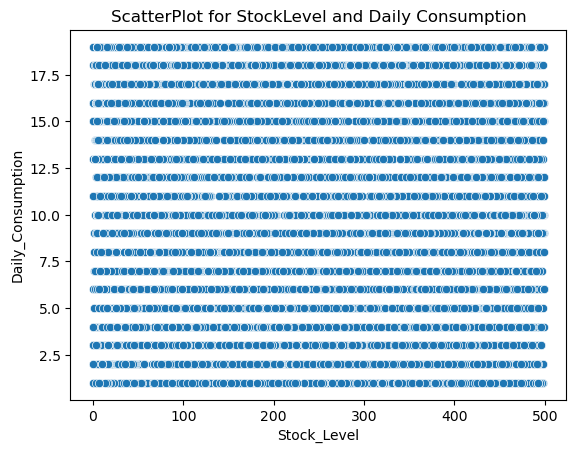

In [33]:
#Scatter PLot
import matplotlib.pyplot as plt
sns.scatterplot(x='Stock_Level',y='Daily_Consumption',data=df)
plt.title('ScatterPlot for StockLevel and Daily Consumption')
plt.show()

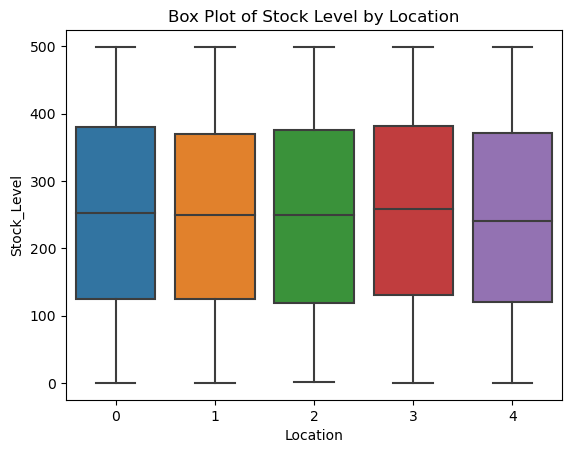

In [27]:
#Box PLOt
sns.boxplot(x='Location', y='Stock_Level', data=df)
plt.title('Box Plot of Stock Level by Location')
plt.show()


<Axes: xlabel='Location', ylabel='Stock_Level'>

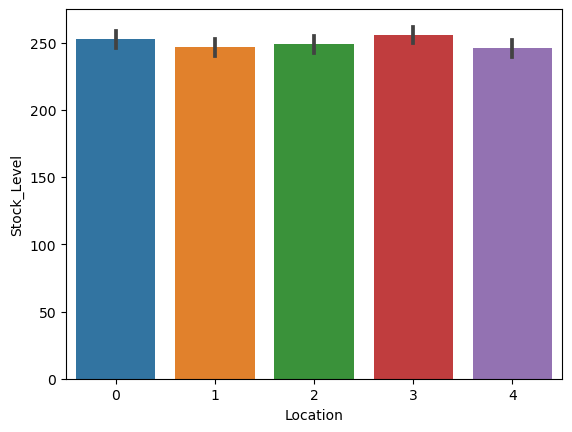

In [29]:
sns.barplot(data=df, x='Location', y='Stock_Level')

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


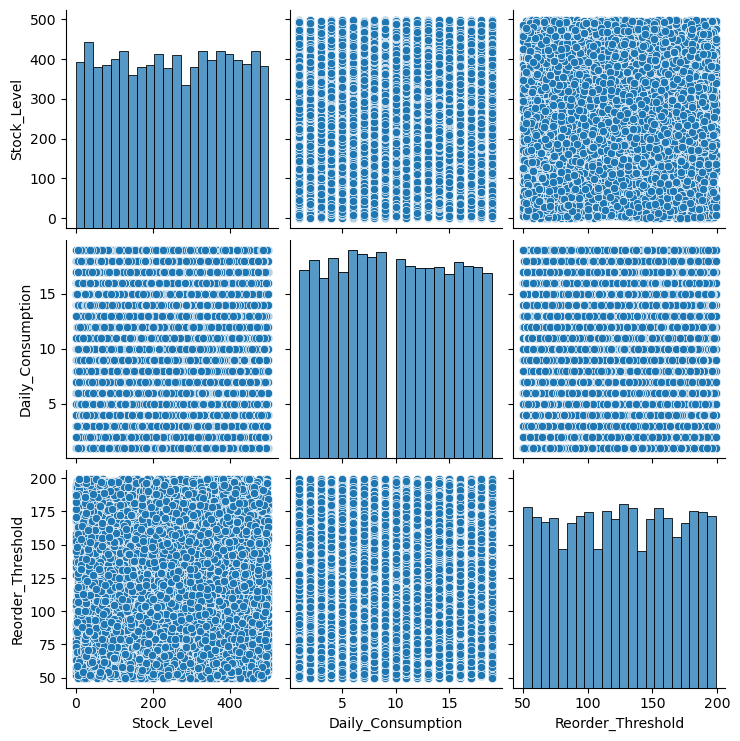

In [30]:
#Pair PLot
sns.pairplot(df[['Stock_Level', 'Daily_Consumption', 'Reorder_Threshold']])
plt.show()

                   Stock_Level  Daily_Consumption  Reorder_Threshold
Stock_Level           1.000000          -0.003081           0.000611
Daily_Consumption    -0.003081           1.000000          -0.014015
Reorder_Threshold     0.000611          -0.014015           1.000000


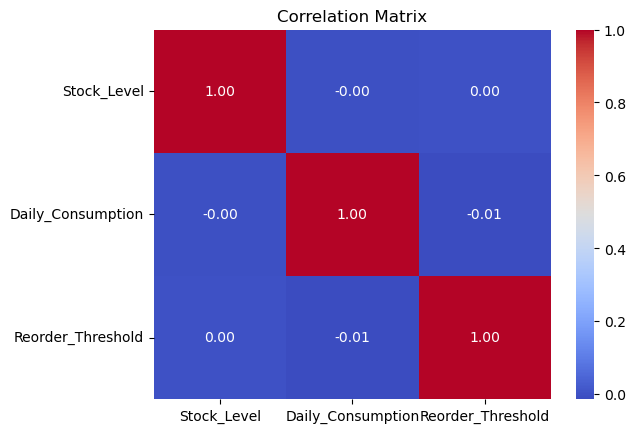

In [31]:
# Calculate correlation matrix for the numeric columns
correlation_matrix = df[['Stock_Level', 'Daily_Consumption', 'Reorder_Threshold']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, you can visualize it with a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [37]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 9968 entries, 0 to 10499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dealer_ID          9968 non-null   int64  
 1   Product_ID         9968 non-null   int32  
 2   Location           9968 non-null   int32  
 3   Stock_Level        9968 non-null   float64
 4   Daily_Consumption  9968 non-null   int64  
 5   Reorder_Threshold  9968 non-null   int64  
dtypes: float64(1), int32(2), int64(3)
memory usage: 467.2 KB


Dealer_ID            0
Product_ID           0
Location             0
Stock_Level          0
Daily_Consumption    0
Reorder_Threshold    0
dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9968 entries, 0 to 10499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dealer_ID          9968 non-null   int64  
 1   Product_ID         9968 non-null   int32  
 2   Location           9968 non-null   int32  
 3   Stock_Level        9968 non-null   float64
 4   Daily_Consumption  9968 non-null   int64  
 5   Reorder_Threshold  9968 non-null   int64  
 6   Inventory_Status   9968 non-null   object 
dtypes: float64(1), int32(2), int64(3), object(1)
memory usage: 545.1+ KB


In [39]:
# Classifying Inventory Status based on Stock Level vs Reorder Threshold
def classify_inventory(row):
    if row['Stock_Level'] < row['Reorder_Threshold']:
        return 'Low Stock'
    else:
        return 'Sufficient Stock'

df['Inventory_Status'] = df.apply(classify_inventory, axis=1)

# Prepare data for classification
X = df[['Stock_Level', 'Daily_Consumption', 'Reorder_Threshold']]
y = df['Inventory_Status'].map({'Low Stock': 1, 'Sufficient Stock': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save updated dataset
df.to_csv('inventory_dataset_classified.csv', index=False)


Accuracy Score: 0.995987963891675

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1510
           1       0.99      0.99      0.99       484

    accuracy                           1.00      1994
   macro avg       1.00      0.99      0.99      1994
weighted avg       1.00      1.00      1.00      1994

